<center><img src="mlw.png">

## <center> Data Set Information

> The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand.

> It includes 7 features known prior to post publication and Lifetime Total Post 

## <center> Data Retrieval - Ain't Nobody Got Time for That

---

<center><img src="ERD.JPG">

In [1]:
import pandas as pd
fb_post_sample_data = pd.read_csv("sample_Facebook.csv", sep=",")

In [2]:
# ASSUMPTION: ANONYMISED - POST_ID REMOVED
fb_post_sample_data.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Impressions
0,139441,Photo,2,12,4,3,0.0,5091
1,139441,Status,2,12,3,10,0.0,19057
2,139441,Photo,3,12,3,3,0.0,4373
3,139441,Photo,2,12,2,10,1.0,87991
4,139441,Photo,2,12,2,3,0.0,13594


In [3]:
fb_post_sample_data.shape

(500, 8)

## Cleansing

In [4]:
# NO DUPLICATES
fb_post_sample_data.duplicated().sum()

0

In [5]:
# MISSING
fb_post_sample_data.isna().sum()

Page total likes                   0
Type                               0
Category                           0
Post Month                         0
Post Weekday                       0
Post Hour                          0
Paid                               1
Lifetime Post Total Impressions    0
dtype: int64

In [6]:
# MISSING VALUE TREATMENT
fb_post_sample_data = fb_post_sample_data.fillna(0)

## Most Basic EDA for a quick start

<center><img src="IDEP.jpg">

In [39]:
# The target
fb_post_sample_data['Lifetime Post Total Impressions'].describe()

count    5.000000e+02
mean     2.958595e+04
std      7.680325e+04
min      5.700000e+02
25%      5.694750e+03
50%      9.051000e+03
75%      2.208550e+04
max      1.110282e+06
Name: Lifetime Post Total Impressions, dtype: float64

In [7]:
# Type of Post
fb_post_sample_data['Type'].value_counts()

Photo     426
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [8]:
# ACTION/PRODUCT/INSPIRATION
fb_post_sample_data['Category'].value_counts()

1    215
3    155
2    130
Name: Category, dtype: int64

In [9]:
# Paid posts
fb_post_sample_data['Paid'].value_counts()

0.0    361
1.0    139
Name: Paid, dtype: int64

In [10]:
# Are paid posts for certain types?
pd.crosstab(fb_post_sample_data['Type'], fb_post_sample_data['Paid'])

Paid,0.0,1.0
Type,,
Link,16,6
Photo,307,119
Status,35,10
Video,3,4


In [11]:
# Are paid posts for certain categories?
pd.crosstab(fb_post_sample_data['Category'], fb_post_sample_data['Paid'])

Paid,0.0,1.0
Category,,
1,151,64
2,98,32
3,112,43


In [12]:
# Monthly coverage
fb_post_sample_data['Post Month'].value_counts().sort_index()

1     25
2     26
3     36
4     50
5     37
6     49
7     52
8     34
9     36
10    60
11    45
12    50
Name: Post Month, dtype: int64

In [13]:
# Posting on which day of the week brought most lifetime impressions? - MAKES NO SENSE NOW BUT CAN WE MAKE SENSE OUT IT??
fb_post_sample_data.groupby('Post Weekday')['Lifetime Post Total Impressions'].median()

Post Weekday
1     7780.5
2     8632.0
3    10026.0
4    12379.5
5     9463.0
6     9193.0
7     7423.5
Name: Lifetime Post Total Impressions, dtype: float64

In [14]:
# Posting at which time of the day brought most lifetime impressions? - MAKES NO SENSE NOW BUT CAN WE MAKE SENSE OUT IT??
fb_post_sample_data.groupby('Post Hour')['Lifetime Post Total Impressions'].median()

Post Hour
1      6702.0
2      9390.0
3      9100.0
4     10115.0
5      9411.0
6     10358.5
7      9835.0
8      5708.5
9      6736.5
10    11003.0
11     7275.0
12    10508.0
13    10317.0
14     7165.0
15     9788.5
16     9238.0
17    22468.0
18     5900.0
19      570.0
20     9970.0
22    24112.0
23     5058.0
Name: Lifetime Post Total Impressions, dtype: float64

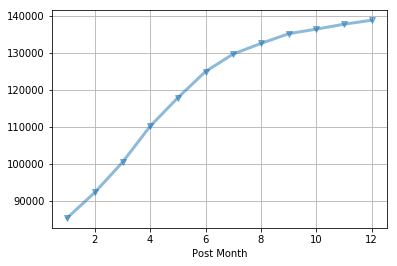

In [15]:
import matplotlib.pyplot as plt
fb_post_sample_data.groupby('Post Month')['Page total likes'].mean().plot(kind='line', linewidth=3, alpha=0.5, marker='v')
plt.grid()
plt.show()

### So, what do we have ready with us for modeling?

---

> The target variable **LTPI**

> The independent feature **Category**

> The independent feature **Paid**

> The independent feature **Page total likes**

<center><img src="DEV.jpg">

In [16]:
from copy import deepcopy
DEV = deepcopy(fb_post_sample_data[fb_post_sample_data['Post Month'] < 11])
print('{} samples in DEV'.format(DEV.shape[0]))
OOT = deepcopy(fb_post_sample_data[fb_post_sample_data['Post Month'] > 10])
print('{} samples in OOT'.format(OOT.shape[0]))

405 samples in DEV
95 samples in OOT


In [17]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split>

In [18]:
target_variable = 'Lifetime Post Total Impressions'
features_to_train_with = ['Category', 'Paid', 'Page total likes']
x_train, x_test, Y_train, Y_test = train_test_split(DEV[features_to_train_with], DEV[target_variable], \
                                                    stratify=DEV['Type'], test_size=0.25, random_state=111)

In [19]:
print('{} samples in training'.format(x_train.shape[0]))
print('{} samples in test'.format(x_test.shape[0]))

303 samples in training
102 samples in test


## <center> Analogy

 <center><img src="bus.jpg">

## Evaluation Yardsticks

---

> * Ease of booking

> * Availability of seats

> * Price of the tickets

> * Journey Time & Route

> * Existing ratings of the bus operators

> * Custom requirements


> And many more .....

---

### Just like a bus, algorithms can be used without knowing for a fact what happens under the hood. However, knowing which algorithm(s) are suitable for the problem is a must. Otherwise it is going to be as lunatic as taking a bus to the moon 

---

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

linear_regression_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=0)
random_forest_model = RandomForestRegressor(random_state=0)

In [21]:
# Our Yardstrick today
from sklearn.metrics import mean_squared_error

## Algo 1

In [22]:
linear_regression_model.fit(x_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
linear_regression_predictions_train = linear_regression_model.predict(x_train)
linear_regression_predictions_train

array([49622.23118446, 48727.7762801 ,  6294.95981507, 23012.45774443,
       26205.61150143, 24350.87955246, 15138.5465638 ,  9133.57308219,
       26239.19239659, 15138.5465638 , 16840.0965665 , 40639.63102462,
       47738.44725938, 13159.28526124, 11975.13452568, 54549.59705582,
       35169.90991062, 23079.56083671, 20254.51284361, 28940.21838432,
       51568.92628829, 22795.31270808, 12458.22594   , 47075.75457669,
       20254.51284361, 25898.25439561, 30765.65726459,  6032.15343931,
       35514.90669733, 25340.20857317, 52562.31409473, 27199.60256901,
       40946.98813044, 63313.43422175, 25340.20857317, 20139.47792645,
       57664.11183938, 17593.00131867, 53262.45463246,  6080.85886803,
       37296.71363104, 21848.6009375 , 25486.28764442, 28549.78929893,
       35169.90991062, 30765.65726459, 21036.33644408, 49169.20644268,
       49622.23118446, 37359.79515249, 53262.45463246, 56214.11063877,
       21196.65848026, 40980.5690256 , 40371.24381848, 58195.4013342 ,
      

In [24]:
mean_squared_error(linear_regression_predictions_train, Y_train)

7177919607.402961

In [25]:
linear_regression_predictions_test = linear_regression_model.predict(x_test)
mean_squared_error(linear_regression_predictions_test, Y_test)

5974820481.023594

In [26]:
linear_regression_predictions_oot = linear_regression_model.predict(OOT[features_to_train_with])
mean_squared_error(linear_regression_predictions_oot, OOT[target_variable])

1035483234.3285202

## Algo 2

In [27]:
decision_tree_model.fit(x_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [28]:
decision_tree_predictions_train = decision_tree_model.predict(x_train)

In [29]:
mean_squared_error(decision_tree_predictions_train, Y_train)

3705386679.510351

In [30]:
decision_tree_predictions_test = decision_tree_model.predict(x_test)
mean_squared_error(decision_tree_predictions_test, Y_test)

12518132474.228096

In [31]:
decision_tree_predictions_oot = decision_tree_model.predict(OOT[features_to_train_with])
mean_squared_error(decision_tree_predictions_oot, OOT[target_variable])

2496527992.4

## Algo 3

In [32]:
random_forest_model.fit(x_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [33]:
random_forest_predictions_train = random_forest_model.predict(x_train)

In [34]:
mean_squared_error(random_forest_predictions_train, Y_train)

4895315110.6289425

In [35]:
random_forest_predictions_test = random_forest_model.predict(x_test)
mean_squared_error(random_forest_predictions_test, Y_test)

6444909455.6366825

In [36]:
random_forest_predictions_oot = random_forest_model.predict(OOT[features_to_train_with])
mean_squared_error(random_forest_predictions_oot, OOT[target_variable])

1509601124.3560467

In [37]:
logger = pd.DataFrame({'TRAIN':[7177919607.402961, 3705386679.510351, 4895315110.6289425],\
              'TEST':[5974820481.023594, 12518132474.228096, 6444909455.6366825],\
              'OOT':[1035483234.3285202, 2496527992.4, 1509601124.3560467]},\
             index=['Linear Regression', 'Decision Tree', 'Random Forest'])
logger

,OOT,TEST,TRAIN
Linear Regression,1.035483e+09,5.974820e+09,7.177920e+09
Decision Tree,2.496528e+09,1.251813e+10,3.705387e+09
Random Forest,1.509601e+09,6.444909e+09,4.895315e+09


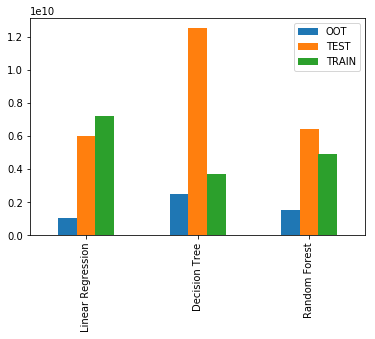

In [38]:
logger.plot(kind='bar')
plt.show()

## <center> Ratings

---

> **Linear Regression (Champion)**
<center><img src='lr_rating.jpg'>

> **Decision Tree (Challenger 2)**
<center><img src='dt_rating.jpg'>

> **Random Forest (Challenger 1)**
<center><img src='rf_rating.jpg'>